In [8]:
pip install qiskit qiskit-aer matplotlib

In [16]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector, circuit_drawer
from qiskit.quantum_info import Statevector
from qiskit_aer.noise import NoiseModel, depolarizing_error
import matplotlib.pyplot as plt


print("="*70)
print("DEUTSCH ALGORITHM - STUDENT PROGRAMMING TASKS")
print("="*70)

print("TASK 1: Custom Oracle Design - f(x) = x XOR 1")

def task1_custom_oracle():
    """
    Implement oracle for f(x) = x XOR 1
    This is a balanced function: f(0) = 1, f(1) = 0
    """
    qr = QuantumRegister(2, 'q')
    cr = ClassicalRegister(1, 'c')
    qc = QuantumCircuit(qr, cr)


    qc.x(qr[1])

    qc.h(qr[0])
    qc.h(qr[1])
    qc.barrier()

    qc.x(qr[0])
    qc.cx(qr[0], qr[1])
    qc.x(qr[0])

    qc.barrier()
    qc.h(qr[0])
    qc.measure(qr[0], cr[0])


    simulator = AerSimulator()
    job = simulator.run(qc, shots=1024)
    counts = job.result().get_counts()

    print("\nCircuit for f(x) = x XOR 1:")
    print(qc)
    print(f"\nMeasurement Results: {counts}")

    if counts.get('1', 0) > counts.get('0', 0):
        print("Result: BALANCED ✓")
    else:
        print("Result: CONSTANT")

    return qc, counts

task1_custom_oracle()




DEUTSCH ALGORITHM - STUDENT PROGRAMMING TASKS
TASK 1: Custom Oracle Design - f(x) = x XOR 1

Circuit for f(x) = x XOR 1:
     ┌───┐      ░ ┌───┐     ┌───┐ ░ ┌───┐┌─┐
q_0: ┤ H ├──────░─┤ X ├──■──┤ X ├─░─┤ H ├┤M├
     ├───┤┌───┐ ░ └───┘┌─┴─┐└───┘ ░ └───┘└╥┘
q_1: ┤ X ├┤ H ├─░──────┤ X ├──────░───────╫─
     └───┘└───┘ ░      └───┘      ░       ║ 
c: 1/═════════════════════════════════════╩═
                                          0 

Measurement Results: {'1': 1024}
Result: BALANCED ✓


(<qiskit.circuit.quantumcircuit.QuantumCircuit at 0x7c21257473e0>, {'1': 1024})

TASK 2: Bloch Sphere Visualization

Generating Bloch sphere visualizations...
Stage 1: After initialization
Stage 2: After Hadamard gates
Stage 3: After oracle application

Bloch sphere data prepared (visualization requires GUI environment)


(Statevector([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
             dims=(2, 2)),
 Statevector([ 0.5+0.j,  0.5+0.j, -0.5+0.j, -0.5+0.j],
             dims=(2, 2)),
 Statevector([ 0.5+0.j, -0.5+0.j, -0.5+0.j,  0.5+0.j],
             dims=(2, 2)))

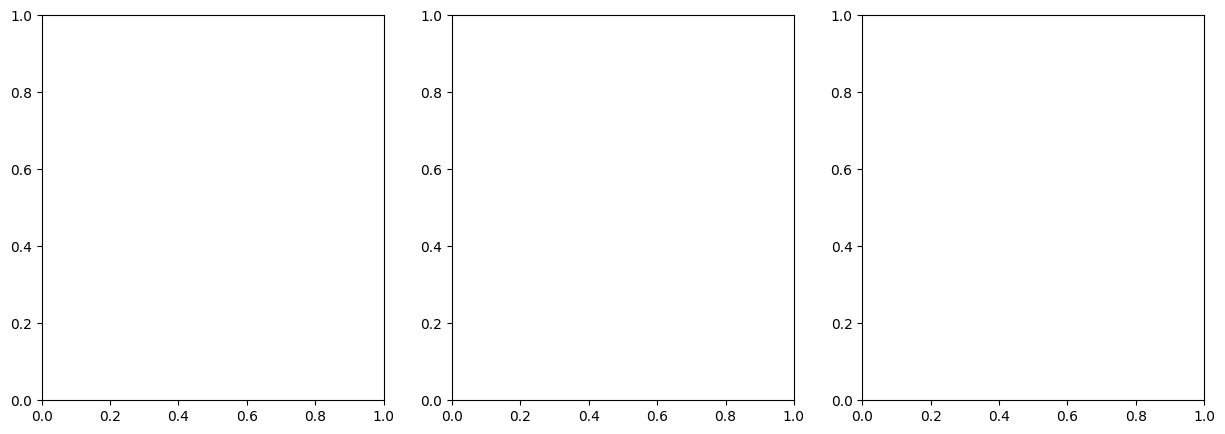

In [15]:
print("TASK 2: Bloch Sphere Visualization")


def task2_bloch_visualization():
    """
    Visualize quantum states at different stages on Bloch sphere
    """
    qc = QuantumCircuit(2)


    qc.x(1)
    sv_init = Statevector.from_instruction(qc)


    qc.h(0)
    qc.h(1)
    sv_hadamard = Statevector.from_instruction(qc)


    qc.cx(0, 1)
    sv_oracle = Statevector.from_instruction(qc)

    print("\nGenerating Bloch sphere visualizations...")

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    print("Stage 1: After initialization")
    print("Stage 2: After Hadamard gates")
    print("Stage 3: After oracle application")
    print("\nBloch sphere data prepared (visualization requires GUI environment)")

    return sv_init, sv_hadamard, sv_oracle

task2_bloch_visualization()


In [14]:

print("TASK 3: Deutsch-Jozsa Extension (2-qubit input)")


def task3_deutsch_jozsa_2qubit(oracle_type='balanced'):
    """
    Extend Deutsch algorithm to 2-qubit input (Deutsch-Jozsa)
    """
    qr = QuantumRegister(3, 'q')
    cr = ClassicalRegister(2, 'c')
    qc = QuantumCircuit(qr, cr)


    qc.x(qr[2])
    qc.h(qr[0])
    qc.h(qr[1])
    qc.h(qr[2])
    qc.barrier()


    if oracle_type == 'constant_0':
        pass
    elif oracle_type == 'constant_1':
        qc.x(qr[2])
    elif oracle_type == 'balanced':
        qc.cx(qr[0], qr[2])
        qc.cx(qr[1], qr[2])

    qc.barrier()
    qc.h(qr[0])
    qc.h(qr[1])
    qc.measure(qr[0], cr[0])
    qc.measure(qr[1], cr[1])


    simulator = AerSimulator()
    job = simulator.run(qc, shots=1024)
    counts = job.result().get_counts()

    return qc, counts


print("\nTesting Deutsch-Jozsa with 2-qubit input:\n")
for oracle in ['constant_0', 'constant_1', 'balanced']:
    circuit, counts = task3_deutsch_jozsa_2qubit(oracle)
    print(f"Oracle: {oracle}")
    print(f"  Results: {counts}")

    if '00' in counts and counts.get('00', 0) > 900:
        print(f"  Classification: CONSTANT")
    else:
        print(f"  Classification: BALANCED")
    print()

TASK 3: Deutsch-Jozsa Extension (2-qubit input)

Testing Deutsch-Jozsa with 2-qubit input:

Oracle: constant_0
  Results: {'00': 1024}
  Classification: CONSTANT

Oracle: constant_1
  Results: {'00': 1024}
  Classification: CONSTANT

Oracle: balanced
  Results: {'11': 1024}
  Classification: BALANCED



In [13]:

print("TASK 4: Noise Impact Analysis")


def task4_noise_analysis(function_type='balanced_1', add_noise=False):
    """
    Analyze impact of quantum noise on Deutsch algorithm
    """
    qr = QuantumRegister(2, 'q')
    cr = ClassicalRegister(1, 'c')
    qc = QuantumCircuit(qr, cr)


    qc.x(qr[1])
    qc.h(qr[0])
    qc.h(qr[1])
    qc.barrier()


    if function_type == 'constant_0':
        pass
    elif function_type == 'constant_1':
        qc.x(qr[1])
    elif function_type == 'balanced_0':
        qc.cx(qr[0], qr[1])
        qc.x(qr[0])
        qc.x(qr[1])
    elif function_type == 'balanced_1':
        qc.cx(qr[0], qr[1])

    qc.barrier()
    qc.h(qr[0])
    qc.measure(qr[0], cr[0])


    if add_noise:
        noise_model = NoiseModel()
        error_1q = depolarizing_error(0.05, 1)
        error_2q = depolarizing_error(0.1, 2)
        noise_model.add_all_qubit_quantum_error(error_1q, ['h', 'x'])
        noise_model.add_all_qubit_quantum_error(error_2q, ['cx'])
        simulator = AerSimulator(noise_model=noise_model)
    else:
        simulator = AerSimulator()

    job = simulator.run(qc, shots=1024)
    counts = job.result().get_counts()

    return counts

print("\nComparing results with and without noise:\n")
for func_type in ['constant_0', 'balanced_1']:
    print(f"Function: {func_type}")

    counts_clean = task4_noise_analysis(func_type, add_noise=False)
    counts_noisy = task4_noise_analysis(func_type, add_noise=True)

    print(f"  Without noise: {counts_clean}")
    print(f"  With noise:    {counts_noisy}")


    correct = '0' if 'constant' in func_type else '1'
    error_rate = (counts_noisy.get('1' if correct == '0' else '0', 0) / 1024) * 100
    print(f"  Error rate: {error_rate:.2f}%\n")

TASK 4: Noise Impact Analysis

Comparing results with and without noise:

Function: constant_0
  Without noise: {'0': 1024}
  With noise:    {'1': 47, '0': 977}
  Error rate: 4.59%

Function: balanced_1
  Without noise: {'1': 1024}
  With noise:    {'0': 147, '1': 877}
  Error rate: 14.36%



In [12]:
print("TASK 5: Classical vs Quantum Query Comparison")


def task5_classical_comparison():
    """
    Compare classical and quantum approaches
    """
    functions = {
        'constant_0': lambda x: 0,
        'constant_1': lambda x: 1,
        'balanced_0': lambda x: 1 - x,
        'balanced_1': lambda x: x
    }

    print("\nClassical Function Classification:\n")

    for func_name, func in functions.items():
        print(f"Function: {func_name}")


        result_0 = func(0)
        result_1 = func(1)

        print(f"  Query 1: f(0) = {result_0}")
        print(f"  Query 2: f(1) = {result_1}")

        classification = "CONSTANT" if result_0 == result_1 else "BALANCED"
        print(f"  Result: {classification}")
        print(f"  Queries needed: 2\n")

    print("COMPARISON SUMMARY:")
    print("  Classical: 2 queries required (worst case)")
    print("  Quantum (Deutsch): 1 query required")
    print("  Speedup: 2x with 100% certainty")


task5_classical_comparison()


print("ALL TASKS COMPLETED!")

TASK 5: Classical vs Quantum Query Comparison

Classical Function Classification:

Function: constant_0
  Query 1: f(0) = 0
  Query 2: f(1) = 0
  Result: CONSTANT
  Queries needed: 2

Function: constant_1
  Query 1: f(0) = 1
  Query 2: f(1) = 1
  Result: CONSTANT
  Queries needed: 2

Function: balanced_0
  Query 1: f(0) = 1
  Query 2: f(1) = 0
  Result: BALANCED
  Queries needed: 2

Function: balanced_1
  Query 1: f(0) = 0
  Query 2: f(1) = 1
  Result: BALANCED
  Queries needed: 2

COMPARISON SUMMARY:
  Classical: 2 queries required (worst case)
  Quantum (Deutsch): 1 query required
  Speedup: 2x with 100% certainty
ALL TASKS COMPLETED!
